# What Makes a Bestselling Book?

# Overview

For our project we decided to analyze what features of a book make it a bestseller. Using data from goodreads, we created a dataset that gave us the genre, author, title, and ratings for a large number of books. Using a variety of bar plots, histograms, scatter plots and Support Vector Machines, we were able to discern that there is a high accuracy rate of correlation between book titles and genre, which makes for a good indication for whether or not the book will become a bestseller. 

# Names

- Christine Nguyen A16114559
- Adi Drapkin A13654388
- Gwendolyn Warner A15421486
- Hwang Min Yu A15334119

<a id='research_question'></a>
# Research Question

What aspects of a novel correlate with a high probability of becoming a bestselling novel in the U.S.? Does a novel’s genre, length, release date, title, or subject matter highly correlate with it becoming successful?

<a id='background'></a>

## Background & Prior Work

- Dataset Name: Fuzzy Book Genres from UCSD Book Graphs
- Link to the dataset: https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/books
- Number of observations: 2360655

This dataset has a list of book ids from GoodReads and for each has a dictionary matching the number of times a genre appears in user book reviews. This is due to GoodReads API not having a way to access a book’s genre.

- Dataset Name: GoodReads-Books
- Link to the dataset: https://www.kaggle.com/jealousleopard/goodreadsbooks
- Number of observations: 11126

This dataset has over 11,000 observations with book information from GoodReads.com including book IDs, title, author, language, number of pages, average rating, number of ratings, publication date, and publisher.

Since book IDs are unique in the GoodReads database, we merged the two datasets on book ID in order to create one dataset (keeping only entries that were available in the 2nd dataset since it’s smaller). 

References (include links):
- 1) https://github.com/amk986/Capstone-Project-Predicting-Book-success

This project uploaded data from goodreads into jupyter notebooks, splitting the data by variables such as author, language, length, ratings, and publication information to analyze patterns that predict the success of a novel. Although the data appears incomplete, the project is a good reference point for understanding how to approach the question, categorize the information, and use graphs to make inferences about the data.
- 2) https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-018-0135-y

The research article published took a look at what it is to make it onto the New York Time's bestseller list and what it takes for a book to be deemed successful amongst the 3 million books sold per year. Using sales patters of books and then the authors themselves, they find that books sale success follows trends similar to that of the economy. As for the authors success, repeat success was based off of serialized books, making familiarity with the author and their reputation a driving force for success. What this paper didn't focus on was attributes of the books themselves and how that leads into success, so for our project, we will try to look more specifically at the correlation between genre, title, and author with high book ratings. 


# Hypothesis


Due to the article released by the website Marketwatch.com called “A data scientist cracks the code to landing on the New York Times best seller list,” we suspect in terms of genre, books that are “slice of life” fiction or autobiographies will best relate to a book’s success. Due to the comfort in familiarity, books written by authors that have released a lot of books will be more popular. Books with key-words in the title would entice a reader, therefore there should be a higher success rate for those books.


# Dataset(s)

- Dataset Name: Fuzzy Book Genres from UCSD Book Graphs
- Link to the dataset: https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/books
- Number of observations: 2360655

This dataset has a list of book ids from GoodReads and for each has a dictionary matching the number of times a genre appears in user book reviews. This is due to GoodReads API not having a way to access a book’s genre.

- Dataset Name: GoodReads-Books
- Link to the dataset: https://www.kaggle.com/jealousleopard/goodreadsbooks
- Number of observations: 11126

This dataset has over 11,000 observations with book information from GoodReads.com including book IDs, title, author, language, number of pages, average rating, number of ratings, publication date, and publisher.

Since book IDs are unique in the GoodReads database, we merged the two datasets on book ID in order to create one dataset (keeping only entries that were available in the 2nd dataset since it’s smaller). 

# Setup

In [175]:
# gzip package is used for reading the datasets
import gzip
# Used to get path to data files
import os
# numpy package is used to use arithmetic functions for cleaning the dataset
import numpy as np
# pandas package is used to work with DataFrame and its features
import pandas as pd
# packges for graphs
import seaborn as sns
import matplotlib.pyplot as plt
# Import nltk package 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Data Cleaning

In [176]:
# parse gzip file into a more readable dataset
def parse(f):
    for l in gzip.open(f):
        yield eval(l)

In [177]:
# Convert gzip json file to list
path = os.path.join('data', 'goodreads_book_genres_initial.json.gz')
dataset = list(parse(path))

In [178]:
# read the dataset for genres and book id as DataFrame
lines = []
for line in dataset:
    lines.append(line)
df = pd.DataFrame(lines)
# change 'book_id' to int data type
df['book_id'] = pd.to_numeric(df['book_id'])
df

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [179]:
# import dataset with book information
path2 = os.path.join('data', 'books1.csv')
dataset2 = pd.read_csv(path2)
dataset2

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11120,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press
11121,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12/1/1988,Penguin Books
11122,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,8/1/1993,Penguin Books
11123,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco


In [180]:
# merge using right merge on two datasets to have one dataset with genres and 
# other additional information
merged = df.merge(dataset2,how='right', left_on='book_id', right_on='bookID')
# drop duplicate column
merged = merged.drop(columns=['book_id'])

In [181]:
# Get the max frequency from each dictionary in genre to represent its key
# as the genre of book
genres = merged['genres']
max_key = []
for i in range(genres.shape[0]):
    line = genres[i]
    # check if the data type of each dictionary is a dictionary
    if isinstance(line,dict):
        # checks if dictionary is empty
        if len(line) > 0:
            # Gets the max frequency and its key from each dictionary
            k = list(line.keys())
            val = list(line.values())
            v = max(val)
            max_key.append(k[val.index(v)])
        else:
            # assign empty string for empty dictionary
            max_key.append('')
    else:
        # assign empty string for non-dictionary values
        max_key.append('')
merged['genres'] = max_key

In [182]:
# clean out empty genre rows and reorder index values
merged = merged[merged['genres'] != ''].reset_index().drop(columns=['index'], axis=1)

In [183]:
merged

,genres,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,"fantasy, paranormal",1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,"fantasy, paranormal",2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,"fantasy, paranormal",4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,fiction,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,"fantasy, paranormal",8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259,non-fiction,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press
9260,fiction,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12/1/1988,Penguin Books
9261,fiction,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,8/1/1993,Penguin Books
9262,non-fiction,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco


# Data Analysis & Results

## Data Exploration

Beginning our analysis, we decide to take a look at the genres first. Since the 'young-adult' category is very small, in order to avoid any outliers, we will merge this category into the fiction category. 

In [184]:
# Looks at the unique genres in the dataset
merged['genres'].unique()

array(['fantasy, paranormal', 'fiction',
       'history, historical fiction, biography', 'non-fiction',
       'children', 'comics, graphic', 'mystery, thriller, crime',
       'poetry', 'romance', 'young-adult'], dtype=object)

In [185]:
# Get count of books for each genre
merged['genres'].value_counts()

fiction                                   3242
non-fiction                               1882
history, historical fiction, biography     869
fantasy, paranormal                        845
mystery, thriller, crime                   824
children                                   527
comics, graphic                            381
romance                                    299
poetry                                     241
young-adult                                154
Name: genres, dtype: int64

In [186]:
# Replace 'young-adult' genre to fiction for simplicity
merged['genres'] = merged['genres'].replace('young-adult', 'fiction')

In [187]:
# Get count of books for each genre
merged['genres'].value_counts()

fiction                                   3396
non-fiction                               1882
history, historical fiction, biography     869
fantasy, paranormal                        845
mystery, thriller, crime                   824
children                                   527
comics, graphic                            381
romance                                    299
poetry                                     241
Name: genres, dtype: int64

For the purpose of our analysis, we want to be able to compare general genre success in addition to the specific ones. Therefore we will add another column to our data set, to compare overall fiction and non-fiction book success. To do this, we must first define what specific genre falls into which category, for example, history will go into non-fiction and comics will be fiction.

In [188]:
# Function for standardizing genres
def standarize_genre(string):
    if 'non-fiction' in string:
        output = 'non-fiction'
    elif 'fantasy' in string:
        output = 'fiction'
    elif 'mystery' in string:
        output = 'fiction'
    elif 'children' in string:
        output = 'fiction'
    elif 'comics' in string:
        output = 'fiction'
    elif 'romance' in string:
        output = 'fiction'
    elif 'fiction' in string:
        output = 'fiction'
    elif 'history' in string:
        output = 'non-fiction'
    else:
        output = 'fiction'
    return output

In [189]:
# apply standardizing function
merged['general genre'] = merged['genres'].apply(standarize_genre)

In [190]:
# Create new DataFrame with only columns needed for analyzing
mdf= merged[['genres','general genre','bookID','title','authors','average_rating','ratings_count','text_reviews_count','publisher']]
mdf

,genres,general genre,bookID,title,authors,average_rating,ratings_count,text_reviews_count,publisher
0,"fantasy, paranormal",fiction,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690,27591,Scholastic Inc.
1,"fantasy, paranormal",fiction,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167,29221,Scholastic Inc.
2,"fantasy, paranormal",fiction,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,6333,244,Scholastic
3,fiction,fiction,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585,36325,Scholastic Inc.
4,"fantasy, paranormal",fiction,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,41428,164,Scholastic
...,...,...,...,...,...,...,...,...,...
9259,non-fiction,non-fiction,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,156,20,Da Capo Press
9260,fiction,fiction,45633,You Bright and Risen Angels,William T. Vollmann,4.08,783,56,Penguin Books
9261,fiction,fiction,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,820,95,Penguin Books
9262,non-fiction,non-fiction,45639,Poor People,William T. Vollmann,3.72,769,139,Ecco


The next thing we are going to use in our analysis are the reviews. However, in order to get an accurate representation of the review, we need no less than 500 people to have reviewed the book. So we will remove any books that were reviewed by less than 500 people. 

In [191]:
# Filter DataFrame for data that has more than 500 reviews for each book
mdf2 = mdf[mdf['text_reviews_count'] >= 500]

In [192]:
# Reset index
mdf2 = mdf2.reset_index(drop = True)

In [193]:
mdf2

,genres,general genre,bookID,title,authors,average_rating,ratings_count,text_reviews_count,publisher
0,"fantasy, paranormal",fiction,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,2095690,27591,Scholastic Inc.
1,"fantasy, paranormal",fiction,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,2153167,29221,Scholastic Inc.
2,fiction,fiction,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,2339585,36325,Scholastic Inc.
3,"fantasy, paranormal",fiction,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,28242,808,Scholastic
4,fiction,fiction,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,249558,4080,Del Rey Books
...,...,...,...,...,...,...,...,...,...
1804,fiction,fiction,45252,Pandora's Star,Peter F. Hamilton,4.24,33987,1519,Del Rey
1805,fiction,fiction,45369,Arthur & George,Julian Barnes,3.7,11626,1141,Vintage International
1806,"fantasy, paranormal",fiction,45432,The Supernaturalist,Eoin Colfer,3.86,24863,1001,Disney-Hyperion
1807,"fantasy, paranormal",fiction,45436,The Wish List,Eoin Colfer,3.77,13988,589,Scholastic Inc.


In [194]:
# Checks the data type of each columns
mdf2.dtypes

genres                object
general genre         object
bookID                 int64
title                 object
authors               object
average_rating        object
ratings_count          int64
text_reviews_count     int64
publisher             object
dtype: object

In [195]:
# converts the 'average_rating' column's object type to float type
mdf2['average_rating'] = pd.to_numeric(mdf2['average_rating'])

## Visualization

To begin our visual analysis, we want to first get an overall sense of the range of all the possible variables and how each is related to each other. 

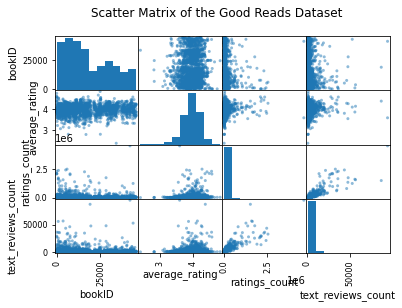

In [196]:
# Create a scatter matrix of our dataset
title = "Scatter Matrix of the Good Reads Dataset"
fig = pd.plotting.scatter_matrix(mdf2)
plt.suptitle(title)
plt.show()

Next we want to compare the general fiction vs. non-fiction genres. We can see based on the bar plot below that there is a significantly higher number of fiction best seller books sold in comparison to non-fiction. 

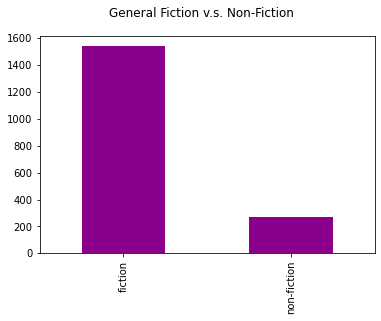

In [197]:
# Plot bar graph for counts of fiction vs non-fiction books
title = "General Fiction v.s. Non-Fiction"
mdf2['general genre'].value_counts().plot.bar(color='darkmagenta')
plt.suptitle(title)
plt.show()

Looking at the bar plot generated below, we observe that even within specific genres, fiction books are still significantly higher in volume of best sellers. 

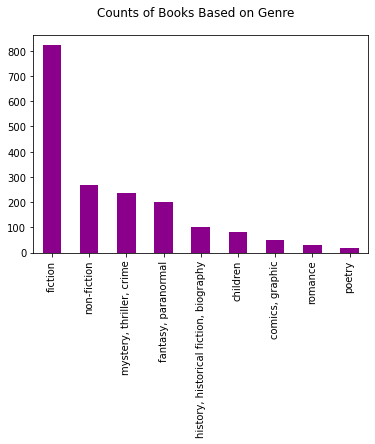

In [198]:
# Plot of books per genre
title = "Counts of Books Based on Genre"
mdf2['genres'].value_counts().plot.bar(color='darkmagenta')
plt.suptitle(title)
plt.show()

The two histograms created below show the average ratings among the fiction and non-fiction best sellers. From this, we can note that there is a higher average scale for fiction (3.5-4.5) than for non-fiction (3.4-4.4). We can also note that the majority of fiction books rate at 4.0 wheras the average for non-fiction sits at 3.9. 

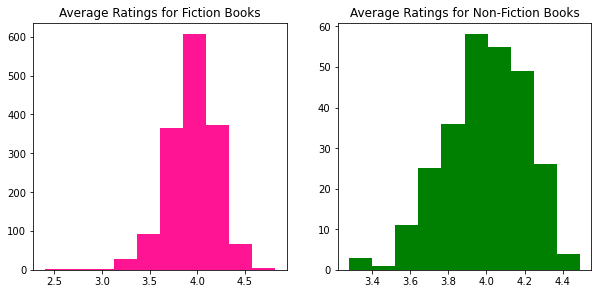

In [199]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.hist(mdf2[mdf2['general genre'] == 'fiction']['average_rating'],bins=10,color="deeppink")
ax1.title.set_text('Average Ratings for Fiction Books')
ax2 = fig.add_subplot(222)
ax2.hist(mdf2[mdf2['general genre'] == 'non-fiction']['average_rating'],bins=10,color='green')
ax2.title.set_text('Average Ratings for Non-Fiction Books')

The two histograms below depict the number of written reviews made on different genres, fiction vs. non-fiction. Based on the histograms, we can see that there are twice the amount of written reviews on fiction books than non-fiction books. 

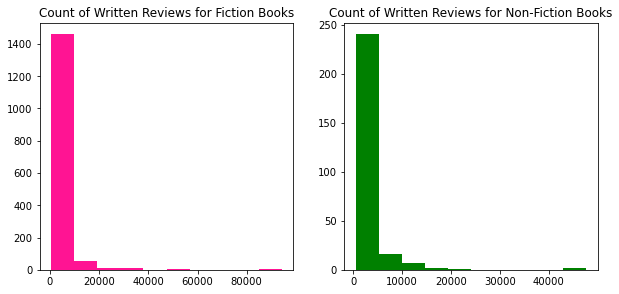

In [200]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.hist(mdf2[mdf2['general genre'] == 'fiction']['text_reviews_count'],bins=10,color="deeppink")
ax1.title.set_text('Count of Written Reviews for Fiction Books')
ax2 = fig.add_subplot(222)
ax2.hist(mdf2[mdf2['general genre'] == 'non-fiction']['text_reviews_count'],bins=10,color='green')
ax2.title.set_text('Count of Written Reviews for Non-Fiction Books')

Here we see the number of people who simply rated the books, one histogram depicting the number of rating for fiction and the other for non-fiction. We can see based off of these histograms that the number of ratings for made for fiction books is five times the amount made for non-fiction books. 

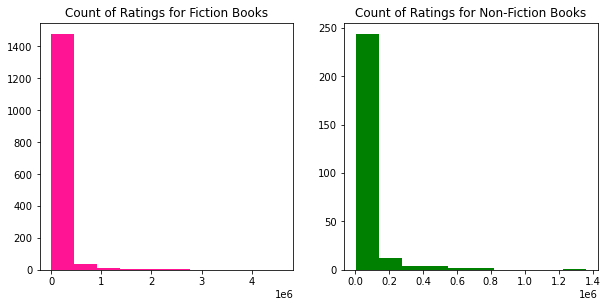

In [201]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.hist(mdf2[mdf2['general genre'] == 'fiction']['ratings_count'],bins=10,color="deeppink")
ax1.title.set_text('Count of Ratings for Fiction Books')
ax2 = fig.add_subplot(222)
ax2.hist(mdf2[mdf2['general genre'] == 'non-fiction']['ratings_count'],bins=10,color='green')
ax2.title.set_text('Count of Ratings for Non-Fiction Books')

We analyzed the relationship between average rating and the number of ratings per book to see if books with higher ratings were bought and read more, as indicated by the rating count. Here we see that there is a slight correlation between average rating and the number of ratings, including those with written reviews. However, most of the books have a rating count below 20,000, even as the average rating increases, making it difficult to establish a strong linear relationship. There is a strong linear correlation between the number of overall ratings and the number of written reviews. One book had over 8,000 text reviews, making it an outlier.

Text(0.5, 1.0, "Scatterplot of 'text_reviews_count' and 'ratings_count'")

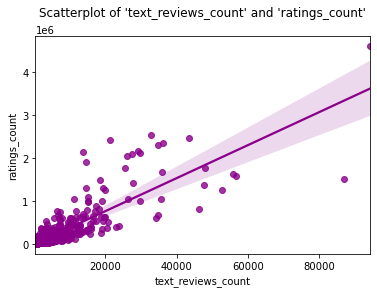

In [202]:
sns.regplot(data=mdf2, x = 'text_reviews_count', y='ratings_count',color='darkmagenta')
ax = plt.gca()
ax.set_title("Scatterplot of 'text_reviews_count' and 'ratings_count'",pad=20)

## Analysis

### Test on title based on rating

Repeating the process above, we are going to run an SVM to predict whether if key words in the title of the book correlate with how high the book gets rated.  

In [203]:
# Function for standardizing ratings
# 0 is low rating, 1 is good rating
def standarize_rating(value):
    if value < 4:
        output = 0
    elif value >= 4:
        output = 1
    return output

In [204]:
# Download the NLTK English tokenizer and the stopwords of all languages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xuyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xuyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

To begin our prediction model, we have to create an object that transforms the text data into vectors with numerical values and then use this object to transform our data set into vectors

In [205]:
vectorizer = CountVectorizer(analyzer= 'word',max_features= 2000,tokenizer= word_tokenize,stop_words=stopwords.words('english'))

In [206]:
mdf2['standard_rating'] = mdf2['average_rating'].apply(standarize_rating)

Now we will define the train and test sets and then define the function that initializes an SVM classifier and trains it. 


In [207]:
MR_X_2 = vectorizer.fit_transform(mdf2["title"]).toarray()

C:\Users\Xuyen\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [208]:
MR_Y_2 =  np.array(mdf2['standard_rating'])

In [209]:
# Function for training inputs to SVM
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    return clf

In [210]:
MR_train_X2,MR_test_X2,MR_train_Y2,MR_test_Y2 = train_test_split(MR_X_2,MR_Y_2,test_size=0.2,random_state=200)

Now we will train our SVM with the default linear kernel and then use it to predict our train and test samples


In [211]:
MR_clf2 = train_SVM(MR_train_X2,MR_train_Y2)

In [212]:
MR_predicted_train_Y2 = MR_clf2.predict(MR_train_X2)
MR_predicted_test_Y2 = MR_clf2.predict(MR_test_X2)

Lastly, we will print out the performance of the classifier on the training set and then on the test set. Taking a look at our prediction models below, we see that the classifier performed on the training set sits at a high 94% accuracy, whereas the the classifier performed on the test set sits significantly lower at 61% accuracy. This is not surprsing, as the training set is used to fine-tune the model hyperparameters, where as the test set is using the model that is fully trained and better curated, giving us a more accurate prediction to evauluate the model. With that being said, while 61% accuracy is not enough to say that the title is a complete indicator of whether a book will do well in the market, it is still high enough to confidently say that there is a correlation between book titles and how high their rating are. This is due to that fact that 61% is higher than chance, which is 50%, which would indicate that there was no meaningful correlation. 

In [213]:
print(classification_report(MR_train_Y2,MR_predicted_train_Y2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       777
           1       0.98      0.86      0.92       670

    accuracy                           0.93      1447
   macro avg       0.94      0.92      0.93      1447
weighted avg       0.93      0.93      0.93      1447



In [214]:
print(classification_report(MR_test_Y2,MR_predicted_test_Y2))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       199
           1       0.59      0.48      0.53       163

    accuracy                           0.61       362
   macro avg       0.61      0.60      0.60       362
weighted avg       0.61      0.61      0.61       362



Taking in the highest ten weights and the lowest ten weights of the SVM and then printing out the word features correlating to those weights, we can see exactly the author names that have a correlation with high or low ratings. 

In [215]:
OneDCoef2 = MR_clf2.coef_.flatten()
TopTenWordsForHighRatings = OneDCoef2.argsort()[-10:][::-1]
TopTenWordsForHighRatings
print("Top 10 Words in Titles That Indicate High Rating: ")
for i in range(0,10):
    print(vectorizer.get_feature_names()[TopTenWordsForHighRatings[i]])
TopTenWordsForLowRatings = (-OneDCoef2).argsort()[-10:][::-1]
print("\nTop 10 Words in Titles That Indicate Low Rating: ")
for i in range(0,10):
    print(vectorizer.get_feature_names()[TopTenWordsForLowRatings[i]])

Top 10 Words in Titles That Indicate High Rating: 
persuasion
rescue
castle
john
nine
babylon
crow
walk
country
peter

Top 10 Words in Titles That Indicate Low Rating: 
affair
thinking
girls
meet
chronicles
austen
beauty
15
winter
bond


### Test on author based on rating

The last SVM that we wanted to run was to see if there was a correlation between the authors themselves and how high the book is rated. 

In [216]:
MR_X_3 = vectorizer.fit_transform(mdf2["authors"]).toarray()

In [217]:
MR_Y_3 =  np.array(mdf2['standard_rating'])

In [218]:
MR_train_X3,MR_test_X3,MR_train_Y3,MR_test_Y3 = train_test_split(MR_X_3,MR_Y_3,test_size=0.2,random_state=200)

In [219]:
MR_clf3 = train_SVM(MR_train_X3,MR_train_Y3)

In [220]:
MR_predicted_train_Y3 = MR_clf3.predict(MR_train_X3)
MR_predicted_test_Y3 = MR_clf3.predict(MR_test_X3)

Similiar to the previous classification reports, we see that that there is a 91% accuracy on the training set and a 64% accuracy on the test set. Again, there is a larger discrepency between the training set and the test set, but as explained before, this is not uncommon. Again, while 64% accuracy is not enough to say that the author's name is a complete indicator of whether a book will do well in the market, it does tell us that there is a correlation between the author's name and a high rating, which could result in the assumption that well known authors have higher ratings on their books due in large part to noteriety of their name.  

In [221]:
print(classification_report(MR_train_Y3,MR_predicted_train_Y3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       777
           1       0.92      0.88      0.90       670

    accuracy                           0.91      1447
   macro avg       0.91      0.91      0.91      1447
weighted avg       0.91      0.91      0.91      1447



In [222]:
print(classification_report(MR_test_Y3,MR_predicted_test_Y3))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       199
           1       0.62      0.56      0.59       163

    accuracy                           0.65       362
   macro avg       0.64      0.64      0.64       362
weighted avg       0.64      0.65      0.64       362



Taking in the highest ten weights and the lowest ten weights of the SVM and then printing out the word features correlating to those weights, we can see exactly the author names that have a correlation with high or low ratings. 

In [223]:
OneDCoef3 = MR_clf3.coef_.flatten()
TopTenAuthorNamesForHighRatings = OneDCoef3.argsort()[-10:][::-1]
TopTenAuthorNamesForHighRatings
print("Top 10 Author Names That Indicate High Rating: ")
for i in range(0,10):
    print(vectorizer.get_feature_names()[TopTenAuthorNamesForHighRatings[i]])
TopTenAuthorNamesForLowRatings = (-OneDCoef3).argsort()[-10:][::-1]
print("\nTop 10 Author Names in Titles That Indicate Low Rating: ")
for i in range(0,10):
    print(vectorizer.get_feature_names()[TopTenAuthorNamesForLowRatings[i]])

Top 10 Author Names That Indicate High Rating: 
sandford
hawking
hobb
kelley
patterson
hamilton
brian
darren
pat
mccaffrey

Top 10 Author Names in Titles That Indicate Low Rating: 
winchester
atwood
levithan
matheson
crichton
harris
sinclair
roth
bryson
mccall


### Test on Genre based on rating

In [224]:
# Function for standardizing genre
# 0 is non-fiction, 1 is fiction
def standarize_fiction(string):
    if 'non-fiction' in string:
        output = 0
    elif 'fiction' in string:
        output = 1
    else:
        output = np.nan
    return output

In [225]:
# Standardize genre
mdf2['fiction_genre'] = mdf2['general genre'].apply(standarize_fiction)

In [226]:
from sklearn.linear_model import LinearRegression
rX = np.array(mdf2['fiction_genre']).reshape(-1,1)
ry = np.array(mdf2['standard_rating']).reshape(-1,1)
reg = LinearRegression().fit(rX, ry)
print("Regression Score [",reg.score(rX, ry),"]")
print("Model Weights [",reg.coef_,"]")

Regression Score [ 0.0026833256467234667 ]
Model Weights [ [[-0.07268008]] ]


This linear regression model that takes as input whether a book is fiction or non-fiction and outputs whether a book is a high-rated book or not has a score of less than 0.003. Considering that a score of 0 correlates to a linear regression model that only guesses the expected value of y, this would mean that there's really no significant correlation between a book's genre and it's book rating. 

# Ethics & Privacy

I don’t believe that there are any term of use issues with the data we propose. It’s possible that some websites may not allow for web scraping under their Terms of Use agreement, but in that case, we simply won’t scrape that website and use another. There are possible biases in the dataset since when we scrape websites we’re compiling information and ratings from people who made online reviews, so the data we’re sampling will most likely exclude people who don’t have access to internet or electronic devices. It’s also possible that some books that are best selling may not be profiled on all websites. To challenge this bias, we could try to find datasets that already incorporate non-internet sources such as a list of best-selling books that wasn’t the result of web scraping. I don’t believe that there are any data privacy issues that could arise since the only possible privacy issue is that we may accidentally scrape usernames when we scrape websites, but we’ll simply take caution as to not do that by accident and in the case that we need to, we’d just sanitize the data before use as to further anonymize the data.

# Conclusion & Discussion

Despite the boom in technology, reading books is still one of the most common pastimes in today’s culture. Throughout this project, we took a look at the common aspects that make up a book, specifically, genre, title, and author, and analyzed which of these makes for a successful book. 


As hypothesized, we were able to discern that a book's title and the author does have an effect on whether a book will have high ratings or not. This makes sense since being a well known author, or one that puts out a high volume of books is key to becoming a bestselling book. Additionally, having a good title, with specific keywords can also give a book a leg up in the competition for bestsellers. One example of this is Stephen Hawkings, since his books always have high ratings and as such, shows up second on the top 10 author names that indicate high ratings. With accuracy at 61% for title and 64% for author, the correlation between these two features and a book's ratings is high enough to make a difference. 


When training a linear regression model on a book's genre, however, the result was no better than random chance with a coefficient of determination R^2 of almost 0. Our hypothesis stated that there was a clear relationship between genre and high ratings, but now we can say certainly that a book's genre won't have a meaningful effect on it's success.

# Team Contributions

Christine Nguyen
- Pair programming with Hwang Min Yu to do the data cleaning, exploring data analysis, and analysis
- Contributed to proposing the framework of the project (write-up for the proposal submission)
- Wrote the ethics and privacy portion for the project
- Co-wrote conclusion for the project

Adi Drapkin
- Wrote the markdowns for the project with Gwendolyn Warner
- Wrote the background and prior works with Gwendolyn Warner
- Co-wrote the conclusion for the project
- Helped set the meetings up for the group
- Initiated the idea and research question for the project

Gwendolyn Warner
- Wrote the markdowns for the project with Adi Drapkin
- Wrote the background and prior works with Adi Drapkin
- Contributed in meetings with stimulating ideas for the projects

Hwang Min Yu
- Pair programming with Christine Nguyen to do the data cleaning, exploring data analysis, and analysis
- Programmed the visualization section of the project
- Cleaned and edited the overall aesthetic of the project